In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [111]:
import pandas as pd

df = pd.read_csv("/content/gdrive/My Drive/ML_practical/10_NLP/spam.tsv", sep = '\t')

print(df.shape)

df.head()

(5572, 4)


,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [112]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [113]:
len(df)

5572

In [114]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

### Balance This Data


In [115]:
ham = df[df['label'] == 'ham']
ham.head

<bound method NDFrame.head of      label                                            message  length  punct
0      ham  Go until jurong point, crazy.. Available only ...     111      9
1      ham                      Ok lar... Joking wif u oni...      29      6
3      ham  U dun say so early hor... U c already then say...      49      6
4      ham  Nah I don't think he goes to usf, he lives aro...      61      2
6      ham  Even my brother is not like to speak with me. ...      77      2
...    ...                                                ...     ...    ...
5565   ham                                       Huh y lei...      12      3
5568   ham               Will ü b going to esplanade fr home?      36      1
5569   ham  Pity, * was in mood for that. So...any other s...      57      7
5570   ham  The guy did some bitching but I acted like i'd...     125      1
5571   ham                         Rofl. Its true to its name      26      1

[4825 rows x 4 columns]>

In [116]:
spam = df[df['label'] == 'spam']
spam.head

<bound method NDFrame.head of      label                                            message  length  punct
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     155      6
5     spam  FreeMsg Hey there darling it's been 3 week's n...     147      8
8     spam  WINNER!! As a valued network customer you have...     157      6
9     spam  Had your mobile 11 months or more? U R entitle...     154      2
11    spam  SIX chances to win CASH! From 100 to 20,000 po...     136      8
...    ...                                                ...     ...    ...
5537  spam  Want explicit SEX in 30 secs? Ring 02073162414...      90      3
5540  spam  ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...     158      5
5547  spam  Had your contract mobile 11 Mnths? Latest Moto...     160      8
5566  spam  REMINDER FROM O2: To get 2.50 pounds free call...     147      3
5567  spam  This is the 2nd time we have tried 2 contact u...     160      8

[747 rows x 4 columns]>

In [117]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [118]:
ham = ham.sample(spam.shape[0])

In [119]:
ham.shape

(747, 4)

In [120]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [121]:
data = ham.append(spam, ignore_index= True)

data.head()



<ipython-input-121-0c6831316db5>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = ham.append(spam, ignore_index= True)


,label,message,length,punct
0,ham,(And my man carlos is definitely coming by mu ...,66,3
1,ham,* Thought I didn't see you.,27,3
2,ham,Tell them u have a headache and just want to u...,69,1
3,ham,Hi mate its RV did u hav a nice hol just a mes...,129,1
4,ham,I don't know jack shit about anything or i'd s...,193,3


In [122]:
data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8




---

### **Exploratory Data Analysis**

---






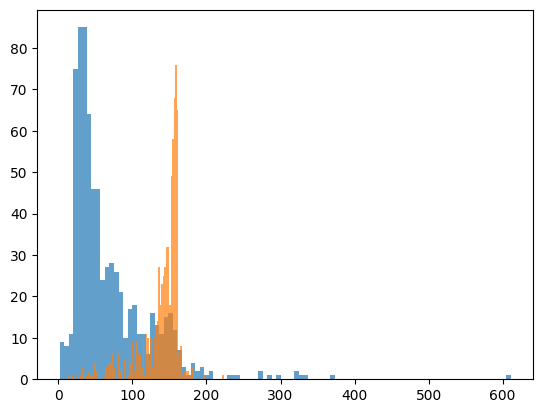

In [123]:
plt.hist(data[data['label']=='ham']['length'], bins = 100, alpha = 0.7)
plt.hist(data[data['label']=='spam']['length'], bins = 100, alpha = 0.7)

plt.show()

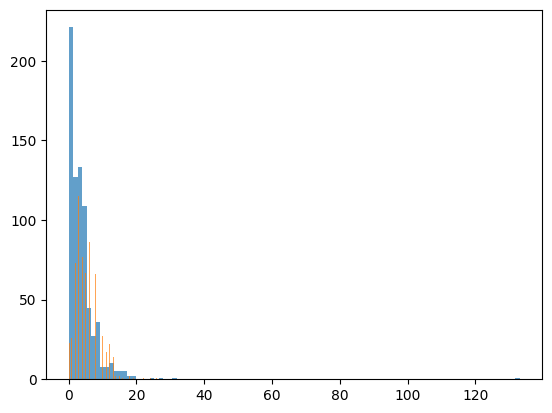

In [124]:
plt.hist(data[data['label']=='ham']['punct'], bins = 100, alpha = 0.7)
plt.hist(data[data['label']=='spam']['punct'], bins = 100, alpha = 0.7)

plt.show()



---

### **Data Preparation**

---






In [125]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline


In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [127]:
data.head()

,label,message,length,punct
0,ham,(And my man carlos is definitely coming by mu ...,66,3
1,ham,* Thought I didn't see you.,27,3
2,ham,Tell them u have a headache and just want to u...,69,1
3,ham,Hi mate its RV did u hav a nice hol just a mes...,129,1
4,ham,I don't know jack shit about anything or i'd s...,193,3


In [136]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size = 0.3, random_state=0, shuffle = True, stratify = data['label'])

In [129]:
y_train

1128    spam
742      ham
477      ham
542      ham
1277    spam
        ... 
1211    spam
312      ham
268      ham
272      ham
1222    spam
Name: label, Length: 1045, dtype: object

### **Bag of Words Creation**

In [130]:
vectorizer = TfidfVectorizer()

In [131]:
X_train = vectorizer.fit_transform(X_train)

In [132]:
X_train.shape

(1045, 3631)

In [133]:
X_train

<1045x3631 sparse matrix of type '<class 'numpy.float64'>'
	with 17538 stored elements in Compressed Sparse Row format>



---

### **Data Pipeline and Random Forest**

---






In [134]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])

In [138]:
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [139]:
y_pred = clf.predict(X_test)

In [140]:
confusion_matrix(y_test, y_pred)

array([[224,   1],
       [ 25, 199]])

In [141]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.90      1.00      0.95       225
        spam       0.99      0.89      0.94       224

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.95      0.94      0.94       449



In [142]:
accuracy_score(y_test, y_pred)

0.9420935412026726

In [143]:
clf.predict(["hey there! Iam using whatsapp"])

array(['ham'], dtype=object)

In [144]:
clf.predict(['''Dear Sellers, Share your referral code with other sellers and earn exciting rewards worth upto INR 1 Lac* on each successful sign-up.
Shiprocket’s Ambassador Program is a uniquely designed opportunity for existing sellers like you who want to boost their earnings.'''])

array(['spam'], dtype=object)

In [145]:
clf.predict(["I love mango"])

array(['ham'], dtype=object)

In [146]:
clf.predict(['''FREE Pass to Join the Greatest Opportunity of the Year 2023 - Become a Pro Data Analyst for FREE! 🚀
Hurry up! *limited period offer ''' ])

array(['spam'], dtype=object)



---

### **SVM**

---






In [147]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC(C = 1000, gamma = 'auto'))])

In [148]:
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', SVC(C=1000, gamma='auto'))])

In [149]:
y_pred = clf.predict(X_test)

In [150]:
confusion_matrix(y_test, y_pred)

array([[218,   7],
       [ 18, 206]])

In [151]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.97      0.95       225
        spam       0.97      0.92      0.94       224

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.95      0.94      0.94       449



In [152]:
accuracy_score(y_test, y_pred)

0.9443207126948775

In [153]:
clf.predict(["hey there! Iam using whatsapp"])

array(['ham'], dtype=object)

In [154]:
clf.predict(['''Dear Sellers, Share your referral code with other sellers and earn exciting rewards worth upto INR 1 Lac* on each successful sign-up.
Shiprocket’s Ambassador Program is a uniquely designed opportunity for existing sellers like you who want to boost their earnings.'''])

array(['spam'], dtype=object)

In [155]:
clf.predict(["I love mango"])

array(['ham'], dtype=object)

In [156]:
clf.predict(['''FREE Pass to Join the Greatest Opportunity of the Year 2023 - Become a Pro Data Analyst for FREE! 🚀
Hurry up! *limited period offer ''' ])

array(['spam'], dtype=object)